### LangGraph (mini-graf stanów)


In [8]:
!pip install -q langgraph langchain langchain-openai python-dotenv


In [9]:
import os
from dotenv import load_dotenv
load_dotenv()
from typing import TypedDict
from langgraph.graph import StateGraph, END


### Definicja stanu

In [10]:
class State(TypedDict):
    x: int

### Definicja węzłów

In [11]:
def add_one(state: State) -> State:
    return {"x": state["x"] + 1}

def multiply_by_two(state: State) -> State:
    return {"x": state["x"] * 2}

def finish(state: State) -> State:
    print(f"Wynik koncowy {state['x']}")
    return state

### Budowa grafu

In [12]:
graph = StateGraph(State)

#definiujemy węzły
graph.add_node("A", add_one)
graph.add_node("B", multiply_by_two)
graph.add_node("C", finish)

#definiujemy połączenia
graph.set_entry_point("A")
graph.add_edge("A", "B")
graph.add_edge("B", "C")
graph.add_edge("C", END)


### Kompilacja i uruchomienie

In [13]:
#kompilacja grafu
app = graph.compile()

result = app.invoke({"x": 1})
print(result)


Wynik koncowy 4
{'x': 4}


### Wizualizacja grafu

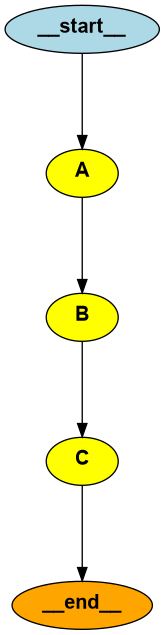

In [14]:
# Rysujemy schemat
from IPython.display import Image, display

png_bytes = app.get_graph().draw_png()
display(Image(png_bytes))
